In [241]:

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

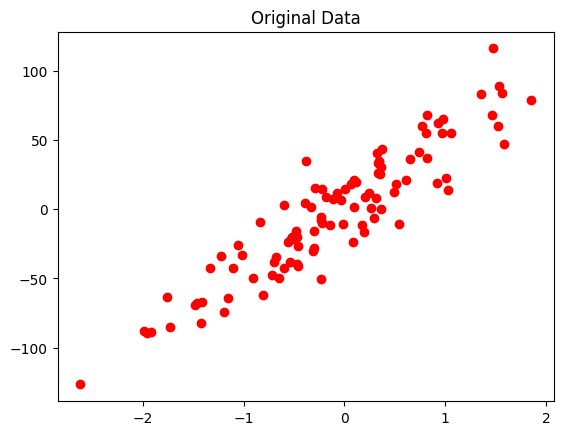

In [242]:
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

plt.plot(X_np, y_np, 'ro')
plt.title("Original Data")
plt.show()
plt.close()

In [243]:
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1) # reshaping y to be a 2D tensor with one column

n_samples, n_features = X.shape

In [244]:
input_size = n_features
output_size = 1

In [245]:
model = nn.Linear(input_size, output_size)

In [246]:
model

Linear(in_features=1, out_features=1, bias=True)

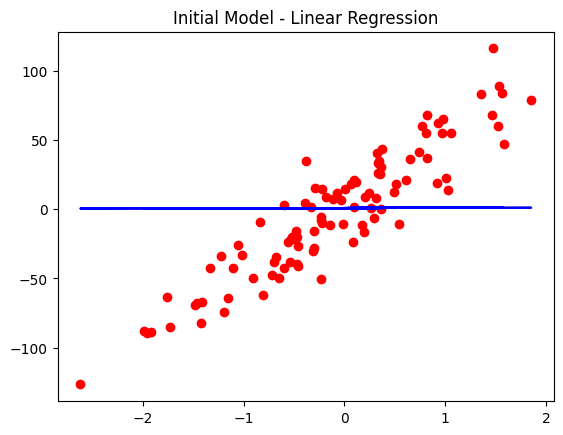

In [247]:
y_hat = model(X)

plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_hat.detach().numpy(), 'b-')   # Detach es para no calcular el gradiente de y_ha
plt.title("Initial Model - Linear Regression")
plt.show()
plt.close()

In [248]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [249]:
MaxIter = 1000

for iter in range(MaxIter):

    # Forward
    y_hat = model(X)
    Err = criterion(y_hat, y)
    
    # Backward
    Err.backward()
    
    # Update
    optimizer.step()
    optimizer.zero_grad()
    
    if (iter % 5 == 0):
        print(f'Iter {iter+1}: Error = {Err.item():.4f}')

Iter 1: Error = 2128.3640
Iter 6: Error = 1607.4186
Iter 11: Error = 1237.6514
Iter 16: Error = 974.6136
Iter 21: Error = 787.1136
Iter 26: Error = 653.2012
Iter 31: Error = 557.3897
Iter 36: Error = 488.7245
Iter 41: Error = 439.4388
Iter 46: Error = 404.0128
Iter 51: Error = 378.5159
Iter 56: Error = 360.1435
Iter 61: Error = 346.8901
Iter 66: Error = 337.3201
Iter 71: Error = 330.4036
Iter 76: Error = 325.4006
Iter 81: Error = 321.7791
Iter 86: Error = 319.1557
Iter 91: Error = 317.2543
Iter 96: Error = 315.8754
Iter 101: Error = 314.8749
Iter 106: Error = 314.1486
Iter 111: Error = 313.6212
Iter 116: Error = 313.2381
Iter 121: Error = 312.9596
Iter 126: Error = 312.7573
Iter 131: Error = 312.6101
Iter 136: Error = 312.5031
Iter 141: Error = 312.4252
Iter 146: Error = 312.3686
Iter 151: Error = 312.3273
Iter 156: Error = 312.2973
Iter 161: Error = 312.2755
Iter 166: Error = 312.2596
Iter 171: Error = 312.2480
Iter 176: Error = 312.2396
Iter 181: Error = 312.2334
Iter 186: Error = 31

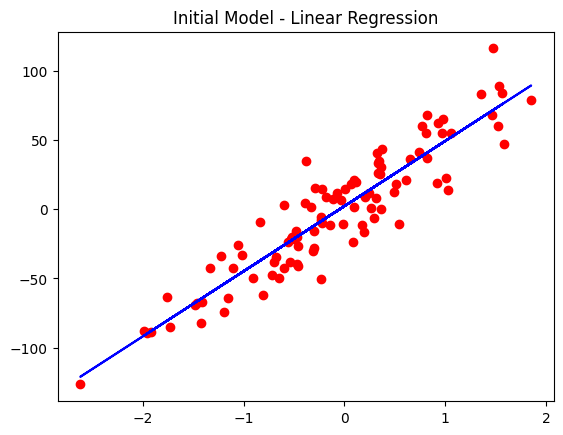

In [250]:
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_hat.detach().numpy(), 'b-')   # Detach es para no calcular el gradiente de y_ha
plt.title("Initial Model - Linear Regression")
plt.show()
plt.close()

In [251]:
print(list(model.parameters()))

[Parameter containing:
tensor([[47.1332]], requires_grad=True), Parameter containing:
tensor([2.3302], requires_grad=True)]


## Regresión Logistica con Pytorch

In [252]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [253]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y, test_size=0.2, random_state=42)

569 30


In [254]:
# scale
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

In [255]:
# Parsing
X_train = torch.from_numpy(X_train_np.astype(np.float32))
X_test = torch.from_numpy(X_test_np.astype(np.float32))
y_train = torch.from_numpy(y_train_np.astype(np.float32))
y_test = torch.from_numpy(y_test_np.astype(np.float32))

In [256]:
# Resghape
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [257]:
from torch.utils.data import Dataset, DataLoader

# Data Loader
class my_DL(Dataset):
    
    def __init__(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
    
    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
    def __len__(self):
        return len(self.y)

my_train_data = my_DL(X_train, y_train)

In [258]:
# Batches
batch_size = 40
print(n_samples%batch_size)
train_DL = DataLoader(dataset=my_train_data, batch_size=batch_size, shuffle=True, drop_last=True)

9


In [259]:
# Model

class LR(nn.Module):
    def __init__(self, n_input):
        super(LR, self).__init__()
        self.linear = nn.Linear(n_input, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LR(n_features)

In [260]:
# Initial test error
with torch.no_grad():
    
    y_hat = model(X_test)
    y_hat_cls = y_hat.round()
    acc = y_hat_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Initial Test Accuracy: {acc * 100:.4f}%')

Initial Test Accuracy: 73.6842%


In [261]:
# Optimizer and Loss
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

In [262]:
# Iterations
num_epochs = 5

for epoch in range(num_epochs):
    batches = train_DL
    for X_train, y_train in batches:
        
        # Forward
        y_hat = model(X_train)
        Err = criterion(y_hat, y_train)
        
        # Backward
        Err.backward()
        
        # Updating 
        optimizer.step()
        optimizer.zero_grad()
        
    if (epoch+1) % 1 == 0:
        print(f'Epoch {epoch+1}: Error = {Err.item():.4f}')

Epoch 1: Error = 0.5172
Epoch 2: Error = 0.4438
Epoch 3: Error = 0.3403
Epoch 4: Error = 0.3245
Epoch 5: Error = 0.2751


In [263]:
# Final test error
with torch.no_grad():
    
    y_hat = model(X_test)
    y_hat_cls = y_hat.round()
    acc = y_hat_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Final Test Accuracy: {acc * 100:.2f}%')

Final Test Accuracy: 98.25%


## Claisificación Pytorch

In [269]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

In [287]:
from sklearn.datasets import load_iris

# Cargar el dataset de iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Shape de X_iris:", X_iris.shape)
print("Shape de y_iris:", y_iris.shape)
print("Clases:", iris.target_names)

Shape de X_iris: (150, 4)
Shape de y_iris: (150,)
Clases: ['setosa' 'versicolor' 'virginica']


In [288]:
df1 = pl.DataFrame({
    "sepal_length": X_iris[:, 0],
    "sepal_width": X_iris[:, 1],
    "petal_length": X_iris[:, 2],
    "petal_width": X_iris[:, 3],
    "target": y_iris
})
df1.head()

sepal_length,sepal_width,petal_length,petal_width,target
f64,f64,f64,f64,i64
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0


In [289]:
def polars_info(df):
    """
    Imprime información similar a df.info() de pandas, pero para un DataFrame de Polars.
    """
    print("Schema / tipos de columna:")
    print(df.schema)
    
    print("\nConteo de nulos por columna:")
    print(df.null_count())
    
    print("\nTamaño estimado en memoria:")
    size_bytes = df.estimated_size()
    size_kb = size_bytes / 1024
    size_mb = size_kb / 1024
    print(f"{size_bytes:.2f} bytes")
    print(f"{size_kb:.2f} KB")
    print(f"{size_mb:.4f} MB")
    
    print("\nEstadísticas descriptivas:")
    print(df.describe())

# Ejemplo de uso:
polars_info(df1)

Schema / tipos de columna:
Schema({'sepal_length': Float64, 'sepal_width': Float64, 'petal_length': Float64, 'petal_width': Float64, 'target': Int64})

Conteo de nulos por columna:
shape: (1, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬────────┐
│ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ target │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---    │
│ u32          ┆ u32         ┆ u32          ┆ u32         ┆ u32    │
╞══════════════╪═════════════╪══════════════╪═════════════╪════════╡
│ 0            ┆ 0           ┆ 0            ┆ 0           ┆ 0      │
└──────────────┴─────────────┴──────────────┴─────────────┴────────┘

Tamaño estimado en memoria:
6000.00 bytes
5.86 KB
0.0057 MB

Estadísticas descriptivas:
shape: (9, 6)
┌────────────┬──────────────┬─────────────┬──────────────┬─────────────┬──────────┐
│ statistic  ┆ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ target   │
│ ---        ┆ ---          ┆ ---         ┆ ---    

In [290]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [291]:
# Separating data

X = df1.select(pl.exclude("target"))
y = df1.select("target")

In [292]:
# Splitting data
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y, test_size=0.2, random_state=42)

In [294]:
# Scaling data

scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

In [297]:
# Parsing
# Convert Polars DataFrames to numpy arrays, then to torch tensors (float)
X_train = torch.FloatTensor(X_train_np)
X_test = torch.FloatTensor(X_test_np)
y_train = torch.LongTensor(y_train_np.to_numpy())
y_test = torch.LongTensor(y_test_np.to_numpy())

In [298]:
from torch.utils.data import Dataset, DataLoader

# Data Loader
class my_DL(Dataset):
    
    def __init__(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
    
    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
    def __len__(self):
        return len(self.y)

my_train_data = my_DL(X_train, y_train)

In [310]:
# Batches
batch_size = 17
print(len(X_train), X_train.shape[0] % batch_size)
train_DL = DataLoader(dataset=my_train_data, batch_size=batch_size, shuffle=True, drop_last=True)
print(len(train_DL))


120 1
7


In [311]:
# Multiclass Logistic Regression Model
class MLR(nn.Module):
    def __init__(self, n_input, n_classes):
        super(MLR, self).__init__()
        self.output_layer = nn.Linear(n_input, n_classes)
    
    def forward(self, x):
        return self.output_layer(x)

In [312]:
# Creating multi-class model
input_dim = 4
output_dim = 3
model = MLR(input_dim, output_dim)

In [313]:
# Optimizer and Loss
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 100
train_losses = []
test_losses = []

# Softmax function inside
criterion = nn.CrossEntropyLoss()

In [316]:
# function to train the model
def train_model(model, optimizer, criterion, train_DL, X_test, y_test, num_epochs, train_losses, test_losses):
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_DL:
            # Squeeze y_batch to shape (batch_size,)
            y_batch = y_batch.squeeze()

            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass
            loss.backward()

            # Update weights
            optimizer.step()
            optimizer.zero_grad()

            # Test performance
            output_test = model(X_test)
            loss_test = criterion(output_test, y_test.squeeze())

            train_losses.append(loss.item())
            test_losses.append(loss_test.item())
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}")    

    return train_losses, test_losses

In [318]:
# Training the model
train_losses, test_losses = train_model(model, optimizer, criterion, train_DL, X_test, y_test, num_epochs, train_losses, test_losses)

Epoch [5/100], Train Loss: 0.1011, Test Loss: 0.1148
Epoch [10/100], Train Loss: 0.0881, Test Loss: 0.1103
Epoch [15/100], Train Loss: 0.1753, Test Loss: 0.1081
Epoch [20/100], Train Loss: 0.1081, Test Loss: 0.1041
Epoch [25/100], Train Loss: 0.1975, Test Loss: 0.1026
Epoch [30/100], Train Loss: 0.0552, Test Loss: 0.0976
Epoch [35/100], Train Loss: 0.0712, Test Loss: 0.0959
Epoch [40/100], Train Loss: 0.1465, Test Loss: 0.0936
Epoch [45/100], Train Loss: 0.1597, Test Loss: 0.0920
Epoch [50/100], Train Loss: 0.0982, Test Loss: 0.0896
Epoch [55/100], Train Loss: 0.0902, Test Loss: 0.0881
Epoch [60/100], Train Loss: 0.1538, Test Loss: 0.0855
Epoch [65/100], Train Loss: 0.0250, Test Loss: 0.0841
Epoch [70/100], Train Loss: 0.0899, Test Loss: 0.0820
Epoch [75/100], Train Loss: 0.1484, Test Loss: 0.0808
Epoch [80/100], Train Loss: 0.1336, Test Loss: 0.0797
Epoch [85/100], Train Loss: 0.0503, Test Loss: 0.0777
Epoch [90/100], Train Loss: 0.0866, Test Loss: 0.0770
Epoch [95/100], Train Loss: 0

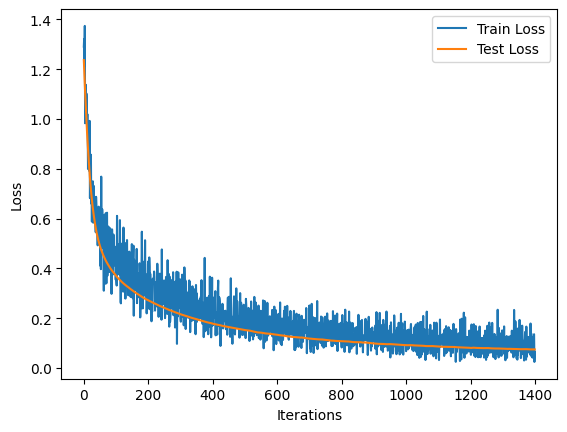

In [319]:
# Graphing losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.close()


In [320]:
# To compute accuracy
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)
    

In [321]:
# To compute accuracy

def get_accuracy(predictions, labels):
    pred_arr = predictions.numpy()
    original_arr = labels.numpy()
    final_pred = []
    
    # One Hot representation to class labels
    for i in range(pred_arr.shape[0]):
        final_pred.append(np.argmax(pred_arr[i]))
    
    final_pred = np.array(final_pred)
    count = 0
    for i in range(len(final_pred)):
        if final_pred[i] == original_arr[i]:
            count += 1
    
    return count / len(final_pred)

In [322]:
train_acc = get_accuracy(predictions_train, y_train)
test_acc = get_accuracy(predictions_test, y_test)

print(f'Train Accuracy: {train_acc * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Train Accuracy: 95.83%
Test Accuracy: 100.00%
